In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd     
import numpy as np

import transformers

from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import FuncFormatter

import os
os.chdir("..")


In [2]:
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['mathtext.fontset'] = 'cm'
# bigger size
mpl.rcParams['font.size'] = 16
# bold x-labels
mpl.rcParams['axes.labelweight'] = 'bold'
# smaller labels on axes
mpl.rcParams['axes.labelsize'] = 14

mpl.rcParams['xtick.labelsize'] = 12

## Load FLORES dataset

In [3]:
# load flores dataset for languages: en, es, pt, fr, it, ro, pl, mt, ja, zh, ko, te, ta

# 99 languages orderd by wikipedia article count
languages = ['en', 'ceb', 'de', 'sv', 'fr', 'nl', 'ru', 'es', 'it', 'pl', 'ja', 'zh', 'uk', 'vi', 'ar', 'pt', 'fa', 'ca', 'sr',
            'id', 'ko', 'no', 'fi', 'tr', 'cs', 'hu', 'ro', 'eu', 'ms', 'eo', 'he', 'hy', 'da', 'bg', 'cy', 'sk', 'uz', 'et',
            'be', 'kk', 'el', 'lt', 'gl', 'ur', 'az', 'sl', 'ka', 'hi', 'th', 'ta', 'bn', 'mk', 'lv', 'af', 'tg', 'my',
            'mg', 'sq', 'mr', 'te', 'ml', 'ky', 'sw', 'jv', 'ht', 'lb', 'su', 'ku', 'ga', 'is', 'fy', 'pa', 'yo', 'ne', 'ha',
            'kn', 'gu', 'mn', 'ig', 'si', 'ps', 'gd', 'sd', 'yi', 'am', 'sn', 'zu', 'km', 'so', 'mi', 'mt', 'lo',
            'xh', 'sm', 'ny', 'st']

palette = sns.color_palette("viridis", len(languages))
languages_colors = {lang: col for lang, col in zip(languages, palette)}
nice_colors = [ ]


# use the code from above to get the flores200 languages
# Latin / Corsican / Hawaiian language not in Flores
languages_flores = {'en': 'eng_Latn', 'ceb': 'ceb_Latn', 'de': 'deu_Latn', 'sv': 'swe_Latn', 'fr': 'fra_Latn', 'nl': 'nld_Latn', 'ru': 'rus_Cyrl', 'es': 'spa_Latn',
                    'it': 'ita_Latn', 'pl': 'pol_Latn', 'ja': 'jpn_Jpan', 'zh': 'zho_Hans', 'uk': 'ukr_Cyrl', 'vi': 'vie_Latn', 'ar': 'arb_Arab',
                    'pt': 'por_Latn', 'fa': 'pes_Arab', 'ca': 'cat_Latn', 'sr': 'srp_Cyrl', 'id': 'ind_Latn', 'ko': 'kor_Hang', 'no': 'nob_Latn',
                    'fi': 'fin_Latn', 'tr': 'tur_Latn', 'cs': 'ces_Latn', 'hu': 'hun_Latn', 'ro': 'ron_Latn', 'eu': 'eus_Latn', 'ms': 'zsm_Latn',
                    'eo': 'epo_Latn', 'he': 'heb_Hebr', 'hy': 'hye_Armn', 'da': 'dan_Latn', 'bg': 'bul_Cyrl', 'cy': 'cym_Latn', 'sk': 'slk_Latn',
                    'uz': 'uzn_Latn', 'et': 'est_Latn', 'be': 'bel_Cyrl', 'kk': 'kaz_Cyrl', 'el': 'ell_Grek', 'lt': 'lit_Latn', 'gl': 'glg_Latn',
                    'ur': 'urd_Arab', 'az': 'azj_Latn', 'sl': 'slv_Latn', 'ka': 'kat_Geor', 'hi': 'hin_Deva', 'th': 'tha_Thai', 'ta': 'tam_Taml',
                    'bn': 'ben_Beng', 'mk': 'mkd_Cyrl',  'lv': 'lvs_Latn', 'af': 'afr_Latn', 'tg': 'tgk_Cyrl', 'my': 'mya_Mymr',
                    'mg': 'plt_Latn', 'sq': 'als_Latn', 'mr': 'mar_Deva', 'te': 'tel_Telu', 'ml': 'mal_Mlym', 'ky': 'kir_Cyrl', 'sw': 'swh_Latn',
                    'jv': 'jav_Latn', 'ht': 'hat_Latn', 'lb': 'ltz_Latn', 'su': 'sun_Latn', 'ku': 'kmr_Latn', 'ga': 'gle_Latn', 'is': 'isl_Latn',
                    'fy': 'fao_Latn', 'pa': 'pan_Guru', 'yo': 'yor_Latn', 'ne': 'npi_Deva', 'ha': 'hau_Latn', 'kn': 'kan_Knda', 'gu': 'guj_Gujr',
                    'mn': 'khk_Cyrl', 'ig': 'ibo_Latn', 'si': 'sin_Sinh', 'ps': 'pbt_Arab', 'gd': 'gla_Latn', 'sd': 'snd_Arab', 'yi': 'ydd_Hebr',
                    'am': 'amh_Ethi', 'sn': 'sna_Latn', 'zu': 'zul_Latn', 'km': 'khm_Khmr', 'so': 'som_Latn', 'mi': 'mri_Latn',
                    'mt': 'mlt_Latn', 'lo': 'lao_Laoo', 'xh': 'xho_Latn', 'sm': 'smo_Latn', 'ny': 'nya_Latn', 'st': 'sot_Latn'}




flores = {}

for lang in languages:
    with open(f'flores200_dataset/devtest/{languages_flores[lang]}.devtest', 'r') as f:
        flores[lang] = f.read().splitlines()

## Define froups of languages

In [4]:
high_res = languages[:25]
high_res_latin = [l for l in high_res if languages_flores[l].endswith("Latn")]
print(high_res_latin)
high_res_nonlatin = [l for l in high_res if not languages_flores[l].endswith("Latn")]
print(high_res_nonlatin)

['en', 'ceb', 'de', 'sv', 'fr', 'nl', 'es', 'it', 'pl', 'vi', 'pt', 'ca', 'id', 'no', 'fi', 'tr', 'cs']
['ru', 'ja', 'zh', 'uk', 'ar', 'fa', 'sr', 'ko']


In [5]:
low_res = languages[25:]
low_res_latin = [l for l in low_res if languages_flores[l].endswith("Latn")]
print(low_res_latin)
low_res_nonlatin = [l for l in low_res if not languages_flores[l].endswith("Latn")]
print(low_res_nonlatin)

['hu', 'ro', 'eu', 'ms', 'eo', 'da', 'cy', 'sk', 'uz', 'et', 'lt', 'gl', 'az', 'sl', 'lv', 'af', 'mg', 'sq', 'sw', 'jv', 'ht', 'lb', 'su', 'ku', 'ga', 'is', 'fy', 'yo', 'ha', 'ig', 'gd', 'sn', 'zu', 'so', 'mi', 'mt', 'xh', 'sm', 'ny', 'st']
['he', 'hy', 'bg', 'be', 'kk', 'el', 'ur', 'ka', 'hi', 'th', 'ta', 'bn', 'mk', 'tg', 'my', 'mr', 'te', 'ml', 'ky', 'pa', 'ne', 'kn', 'gu', 'mn', 'si', 'ps', 'sd', 'yi', 'am', 'km', 'lo']


## Define froups of languages

In [6]:
sample = ['en', 'de', 'fr', 'ru', 'pl', 'ja', 'vi', 'ko','hy', 'kk', 'el', 'ta','te','am', 'sn', 'mt', 'sm', 'st']
en = ['en']
latin_high_res = ['en', 'de', 'sv', 'fr', 'nl', 'es', 'it', 'pl', 'vi', 'pt', 'ca', 'fi', 'tr', 'cs', 'hu', 'eu']
latin_low_res = ['ceb','id','no', 'ro', 'ms', 'eo', 'da', 'cy', 'sk', 'uz', 'et', 'lt', 'gl', 'az', 'sl', 'lv', 'af', 'mg', 'sq', 'sw', 'jv',
 'ht', 'lb', 'su', 'ku', 'ga', 'is', 'fy', 'yo', 'ha', 'ig', 'gd', 'sn', 'zu', 'so', 'mi', 'mt', 'xh', 'sm', 'ny', 'st']
non_latin_high_res = ['ru', 'ja', 'zh', 'ar', 'fa', 'sr', 'ko', 'hi']
non_latin_low_res = ['uk', 'he', 'hy', 'bg', 'be', 'kk', 'el', 'ur', 'ka', 'th', 'ta', 'bn', 'mk', 'tg', 'my', 'mr', 'te',
                     'ml', 'ky', 'pa', 'ne', 'kn', 'gu', 'mn', 'si', 'ps', 'sd', 'yi', 'am', 'km', 'lo']
unseen_lang = ['sa', 'war', 'aeb', 'ast', 'eo']
unseen_script = ["sal"]



language_groups = {}
language_groups_coarse = {}
for language in latin_high_res:
    language_groups[language] = 'Latin HR'
    language_groups_coarse[language] = 'Seen'
for language in latin_low_res:
    language_groups[language] = 'Latin LR'
    language_groups_coarse[language] = 'Seen'
for language in non_latin_high_res:
    language_groups[language] = 'Non-Latin HR'
    language_groups_coarse[language] = 'Seen'
for language in non_latin_low_res:
    language_groups[language] = 'Non-Latin LR'
    language_groups_coarse[language] = 'Seen'
for language in unseen_lang:
    language_groups[language] = 'Unseen Lang'
    language_groups_coarse[language] = 'Unseen'
for language in unseen_script:
    language_groups[language] = 'Unseen Script'
    language_groups_coarse[language] = 'Unseen'



In [7]:
flores_chars = flores.copy()
flores_utf32 = {lang: [bytes(line, 'utf-32') for line in flores[lang]] for lang in flores.keys()}
flores_bytes = {lang: [bytes(line, 'utf-8') for line in flores[lang]] for lang in flores.keys()}
flores_words = {lang: [line.split() for line in flores[lang]] for lang in flores.keys()}


In [8]:
# MT-5 tokenizer
tokenizer = transformers.AutoTokenizer.from_pretrained("google/mt5-xxl")
flores_mt5 = {lang: [tokenizer.encode(line) for line in flores[lang]] for lang in flores.keys()}

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/Users/tomasz/.virtualenvs/fair_segmentation/lib/python3.9/site-packages/transformers/convert_slow_tokenizer.py:560: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


## Plot the number of tokens per language

In [9]:
def get_language_ordering(lang_tokenized):
    token_numbers = {}
    for lang in lang_tokenized.keys():
        token_numbers[lang] = sum(len(tokenized_line) for tokenized_line in lang_tokenized[lang]) / len(lang_tokenized[lang])

    sorted_language = [x[0] for x in sorted(token_numbers.items(), key=lambda x: x[1], reverse=True)]

    return sorted_language

In [10]:
def plot_token_numbers(lang_tokenized,  save_file=None, ymax=None, language_ordering=None, languages_colors=languages_colors, title=None):
    token_numbers = {}
    for lang in lang_tokenized.keys():
        token_numbers[lang] = sum(len(tokenized_line) for tokenized_line in lang_tokenized[lang]) / len(lang_tokenized[lang])
    # sort by value
    if language_ordering is None:
        token_numbers = dict(sorted(token_numbers.items(), key=lambda item: item[1], reverse=True))
    else:
        token_numbers = {lang: token_numbers[lang] for lang in language_ordering}
    plt.figure(figsize=(9, 5.25))
    if len(token_numbers) < 20:
        plt.figure(figsize=(6.75, 5.25))
    else:
        plt.figure(figsize=(19.2 * 0.75, 7.2*0.75))
    lang_codes = [l.upper() for l in token_numbers.keys()]
    plt.bar(lang_codes, token_numbers.values())
    for i, lang in enumerate(token_numbers.keys()):
        plt.bar(i, token_numbers[lang], color=languages_colors[lang])
    if len(token_numbers) < 20:
        plt.xticks(rotation=45, weight='bold')
    else:
        plt.xticks(rotation=90, weight='bold')
    
    if len(token_numbers) >= 20:
        plt.ylabel("Avg. sentence length", size=18)
    else:
        plt.ylabel("Avg. sentence length")
    if ymax:
        ax = plt.gca()
        ax.set_ylim([0.,ymax])
    if title:
        plt.title(title)
    if save_file:
        plt.tight_layout()
        plt.savefig(f"{save_file}.png", dpi=300)
        
    plt.show()

In [11]:
def plot_compare_token_numbers(lang_tokenized_methods, method_names, save_file=None, parity=None, violin=True):
   
    assert len(lang_tokenized_methods) == len(method_names)
    token_number_methods = {}
    for lang_tokenized, method in zip(lang_tokenized_methods, method_names):
        token_numbers = {}
        for lang in lang_tokenized.keys():
            token_numbers[lang] = sum(len(tokenized_line) for tokenized_line in lang_tokenized[lang]) / len(lang_tokenized[lang])
        token_number_methods[method] = token_numbers

    
    token_number_methods = pd.DataFrame(token_number_methods)
    if parity and parity in token_number_methods.index:
        token_number_methods = token_number_methods / token_number_methods.loc[parity,:]
    print(token_number_methods)
    # compute mean and std
    print(f"Means: {token_number_methods.mean(axis=0)}")
    print(f"Std: {token_number_methods.std(axis=0)}")

    sns.set_palette(['#B2DF8A', '#B3CDE3','#FDBF6F', '#FCCDE5', '#D9D9D9'])

    if violin:
        sns.violinplot(data=token_number_methods)
    else:
        sns.boxplot(data=token_number_methods)
    #plt.boxplot(token_number_methods, labels=method_names)
    plt.xticks(weight='bold')
    if parity:
        plt.ylabel("Parity")
    else:
        plt.ylabel("Line avg. segemnets")
        #plt.semilogy()
    if save_file:
        plt.tight_layout()
        plt.savefig(f"{save_file}.png", dpi=300)
    plt.show()

In [ ]:
# plot paired

In [12]:
def compute_log_diff(lang_tokenized):
    token_numbers = []
    for lang in lang_tokenized.keys():
        token_numbers.append(sum(len(tokenized_line) for tokenized_line in lang_tokenized[lang]) / len(lang_tokenized[lang]))
    token_numbers = np.array(token_numbers)

    log_min_diff = np.sum(np.log(token_numbers)) - len(token_numbers) * np.log(token_numbers.min())
    log_mean_diff = - np.sum(np.log(token_numbers)) + len(token_numbers) * np.log(token_numbers.mean())

    print(f"Log min diff: {log_min_diff}")
    print(f"Log mean diff: {log_mean_diff}")

In [13]:
language_ordering = get_language_ordering(flores_bytes)
language_ordering_sample = get_language_ordering({k:v for k, v in flores_bytes.items() if k in sample})

<Figure size 900x525 with 0 Axes>

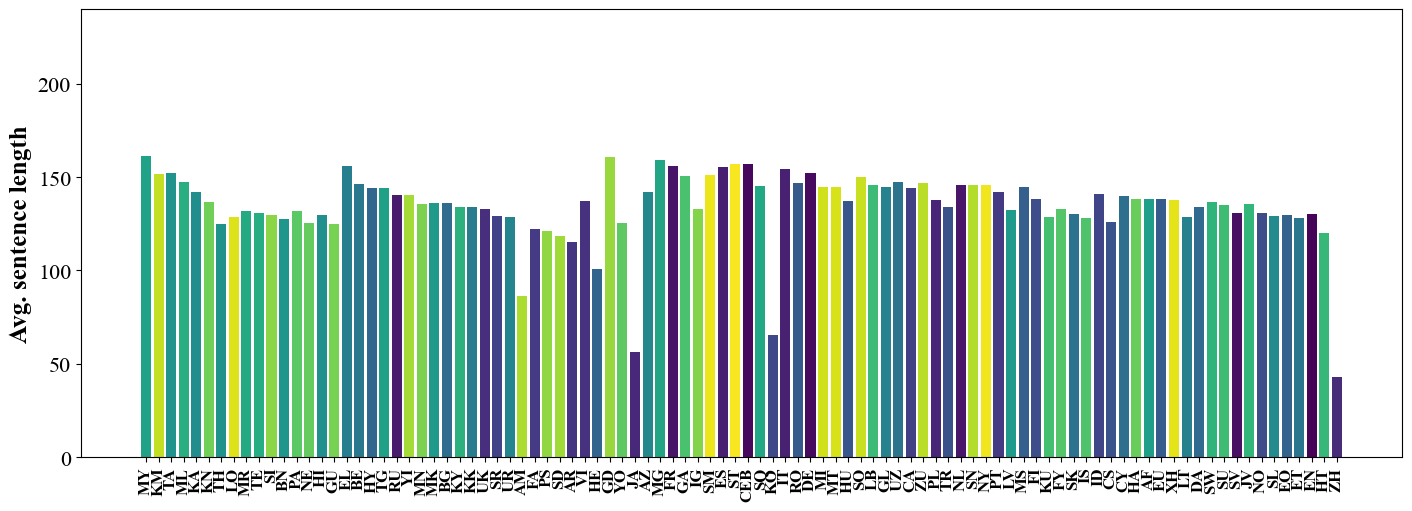

Log min diff: 108.89322756149619
Log mean diff: 1.3751756589638262


In [14]:
plot_token_numbers(flores_chars, "characters", 240., language_ordering=language_ordering)
compute_log_diff(flores_chars)

<Figure size 900x525 with 0 Axes>

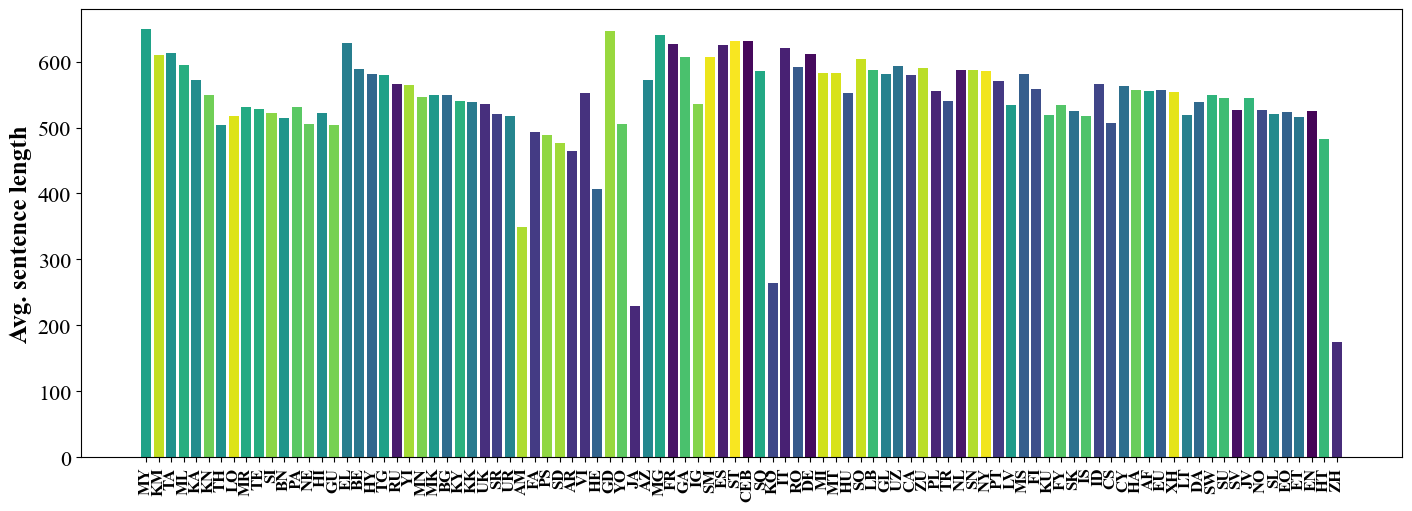

Log min diff: 107.40930472034756
Log mean diff: 1.3483255675787404


In [15]:
plot_token_numbers(flores_utf32, "bytes_utf32", 680., language_ordering=language_ordering)
compute_log_diff(flores_utf32)

<Figure size 900x525 with 0 Axes>

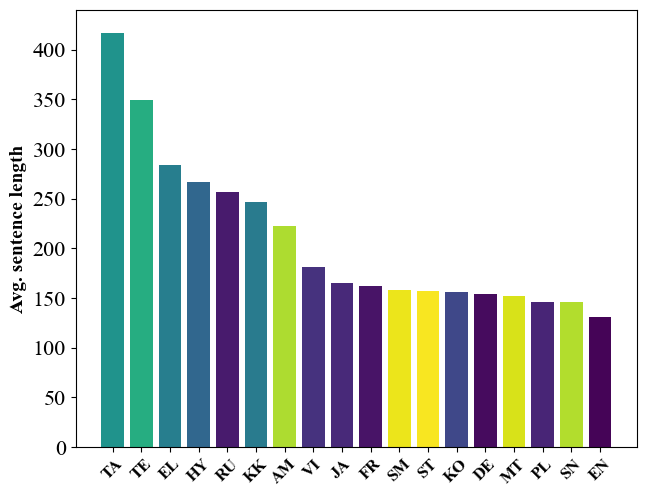

Log min diff: 44.13325594592493
Log mean diff: 7.000248016709463


In [16]:
plot_token_numbers(flores_bytes, "bytes_utf8_sample", 440., language_ordering=language_ordering_sample)
compute_log_diff(flores_bytes)

In [17]:
print(language_ordering_sample)

['ta', 'te', 'el', 'hy', 'ru', 'kk', 'am', 'vi', 'ja', 'fr', 'sm', 'st', 'ko', 'de', 'mt', 'pl', 'sn', 'en']


<Figure size 900x525 with 0 Axes>

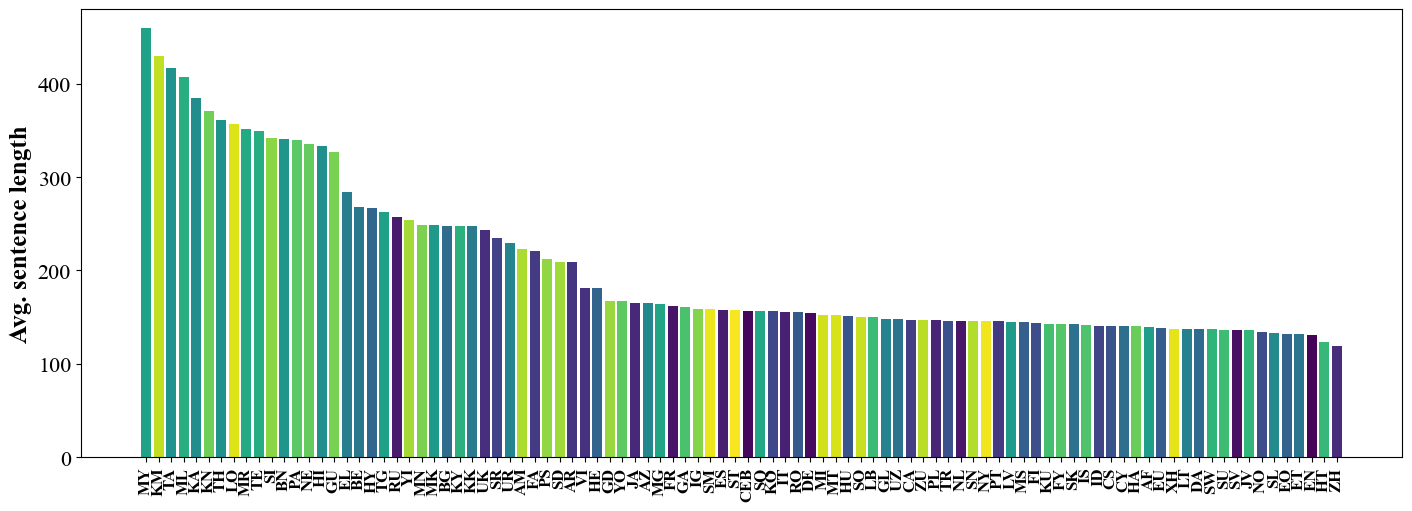

Log min diff: 44.13325594592493
Log mean diff: 7.000248016709463


In [18]:
plot_token_numbers(flores_bytes, "bytes_utf8", 480., language_ordering=language_ordering)
compute_log_diff(flores_bytes)

<Figure size 900x525 with 0 Axes>

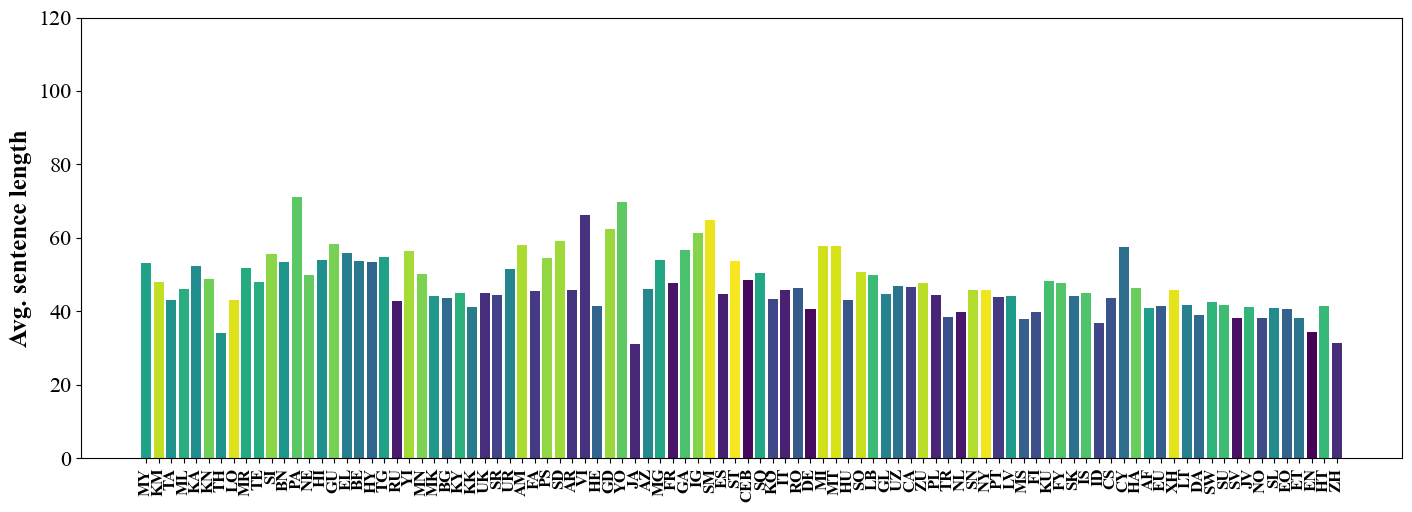

Log min diff: 39.22300524412037
Log mean diff: 1.265491247132843


In [19]:
plot_token_numbers(flores_mt5, "subword_tokens", 120., language_ordering=language_ordering)
compute_log_diff(flores_mt5)

## Morfessor rewriting

In [20]:
from src.rewrite_bytes import ByteRewriter
from src.utils import str_to_hex

In [21]:
decompose_file = "byte_maps/decompose.json"
decompose_lc_file = "byte_maps/decompose_lc.json"
morf_all_map_file = "byte_maps/morf_map_all_cost_clustered.json"
morf_unigram_map_file = "byte_maps/morf_map_unigram_clustered.json"
morf_all_lc_map_file = "byte_maps/morf_map_all_lc_cost_clustered.json"

decompose_rewriter = ByteRewriter(decompose_file)
decompose_lc_rewriter = ByteRewriter(decompose_lc_file)
morf_all_rewriter = ByteRewriter(morf_all_map_file)
morf_unigram_rewriter = ByteRewriter(morf_unigram_map_file)
morf_all_lc_rewriter = ByteRewriter(morf_all_map_file)

flores_decomposed_rw = {lang: [decompose_rewriter.rewrite_bytes(str_to_hex(line).split(' ')) for line in flores[lang]] for lang in flores.keys()}
flores_morfs_all_rw = {lang: [morf_all_rewriter.rewrite_bytes(decompose_rewriter.rewrite_bytes(str_to_hex(line).split(' '))) for line in flores[lang]] for lang in flores.keys()}
flores_unigram_rw = {lang: [morf_unigram_rewriter.rewrite_bytes(decompose_rewriter.rewrite_bytes(str_to_hex(line).split(' '))) for line in flores[lang]] for lang in flores.keys()}
flores_morfs_all_lc_rw = {lang: [morf_all_lc_rewriter.rewrite_bytes(decompose_lc_rewriter.rewrite_bytes(str_to_hex(line).split(' '))) for line in flores[lang]] for lang in flores.keys()}

<Figure size 900x525 with 0 Axes>

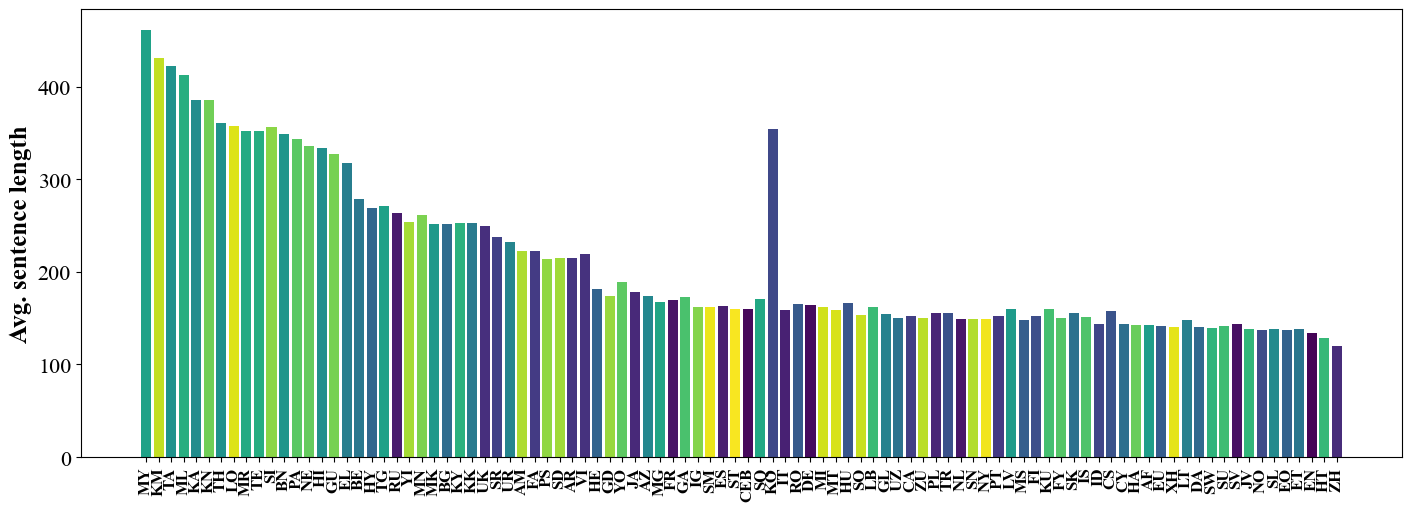

Log min diff: 48.046692496588776
Log mean diff: 6.668244955729392


In [22]:
title = f"Morfs rewritten in UTF-8 decompose"
plot_token_numbers(flores_decomposed_rw , title, language_ordering=language_ordering)
compute_log_diff(flores_decomposed_rw)

<Figure size 900x525 with 0 Axes>

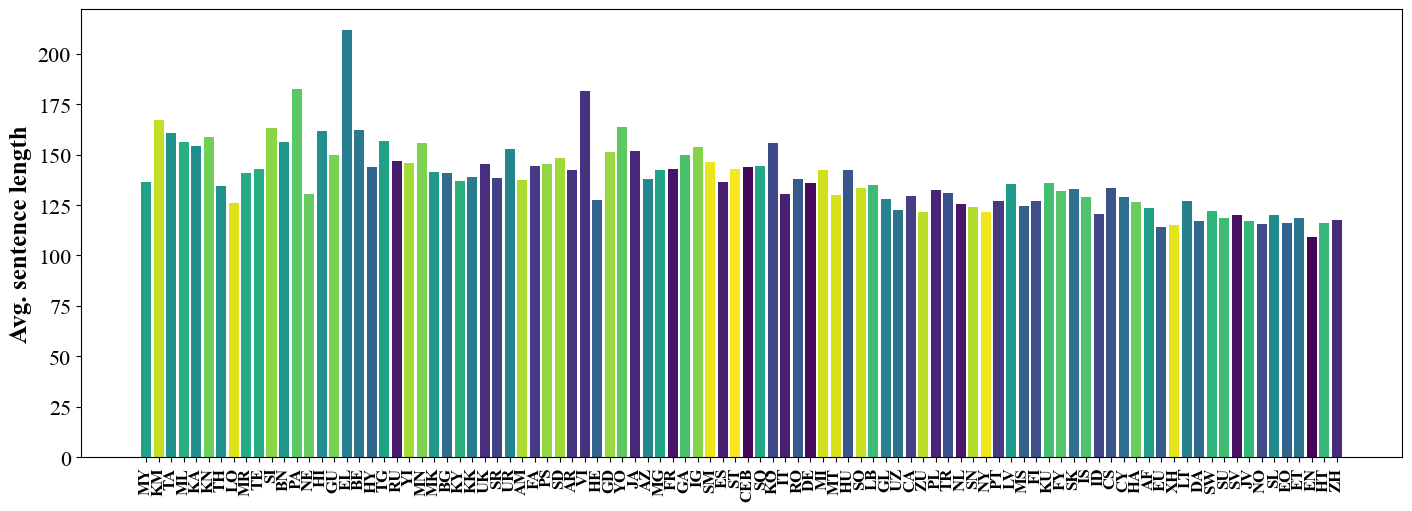

Log min diff: 22.181870324310808
Log mean diff: 0.6616125936030812


In [23]:
title = f"Morfs (all) not decomposed rewritten in UTF-8"
plot_token_numbers(flores_morfs_all_lc_rw , title, language_ordering=language_ordering)
compute_log_diff(flores_morfs_all_lc_rw)

<Figure size 900x525 with 0 Axes>

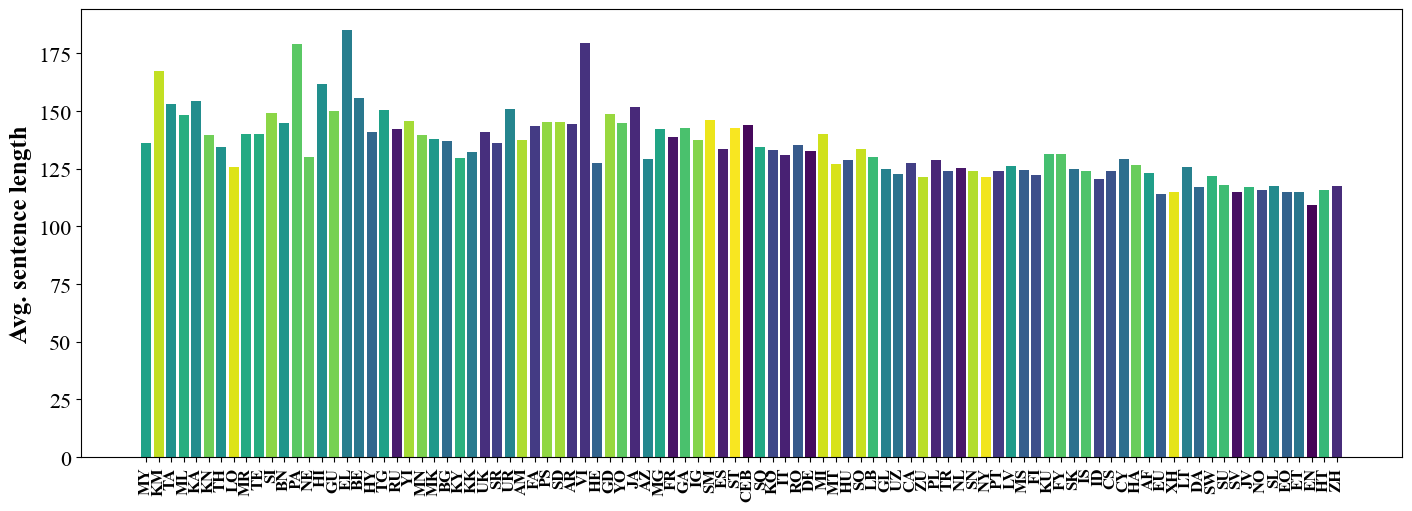

Log min diff: 19.682763598835948
Log mean diff: 0.5284102530173982


In [24]:
title = f"Morfs (all) rewritten in UTF-8"
plot_token_numbers(flores_morfs_all_rw , title, language_ordering=language_ordering)
compute_log_diff(flores_morfs_all_rw)

<Figure size 900x525 with 0 Axes>

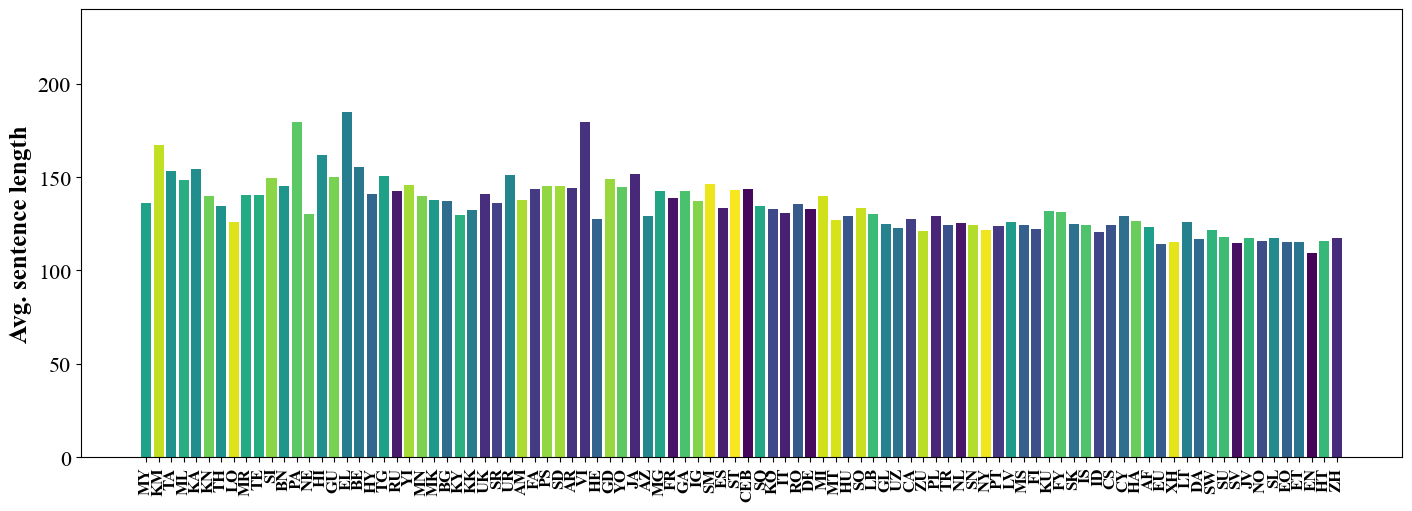

Log min diff: 19.682763598835948
Log mean diff: 0.5284102530173982


In [25]:
title = f"Morphs added to UTF-8"
plot_token_numbers(flores_morfs_all_rw , "mbytes", 240., language_ordering=language_ordering)
compute_log_diff(flores_morfs_all_rw)

<Figure size 900x525 with 0 Axes>

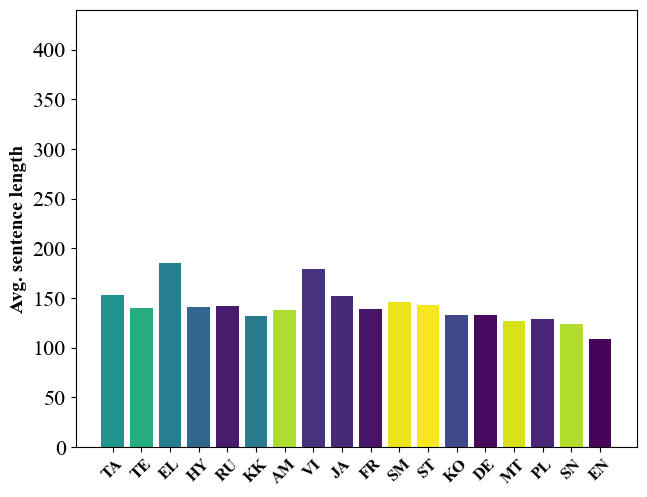

Log min diff: 19.682763598835948
Log mean diff: 0.5284102530173982


In [26]:
title = f"Morphs added to UTF-8"
plot_token_numbers(flores_morfs_all_rw , "mbytes_sample", 440., language_ordering=language_ordering_sample)
compute_log_diff(flores_morfs_all_rw)

<Figure size 900x525 with 0 Axes>

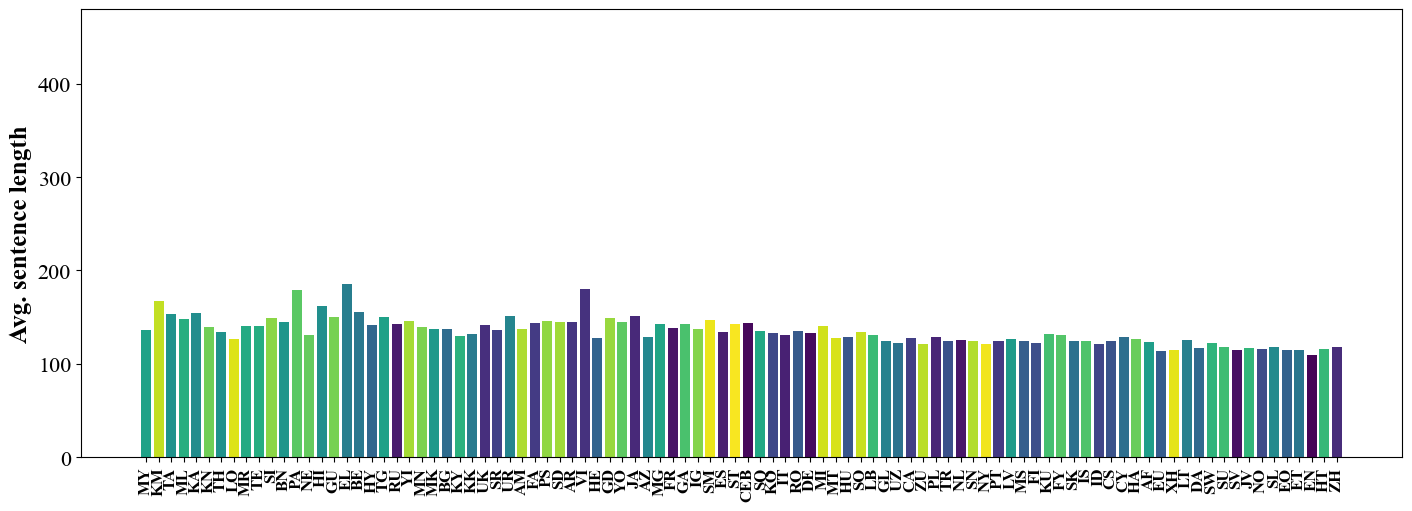

Log min diff: 19.682763598835948
Log mean diff: 0.5284102530173982


In [27]:
title = f"Unigram Subwords rewritten in UTF-8"
plot_token_numbers(flores_morfs_all_rw,"mbytes", 480.,language_ordering=language_ordering)
compute_log_diff(flores_morfs_all_rw)

<Figure size 900x525 with 0 Axes>

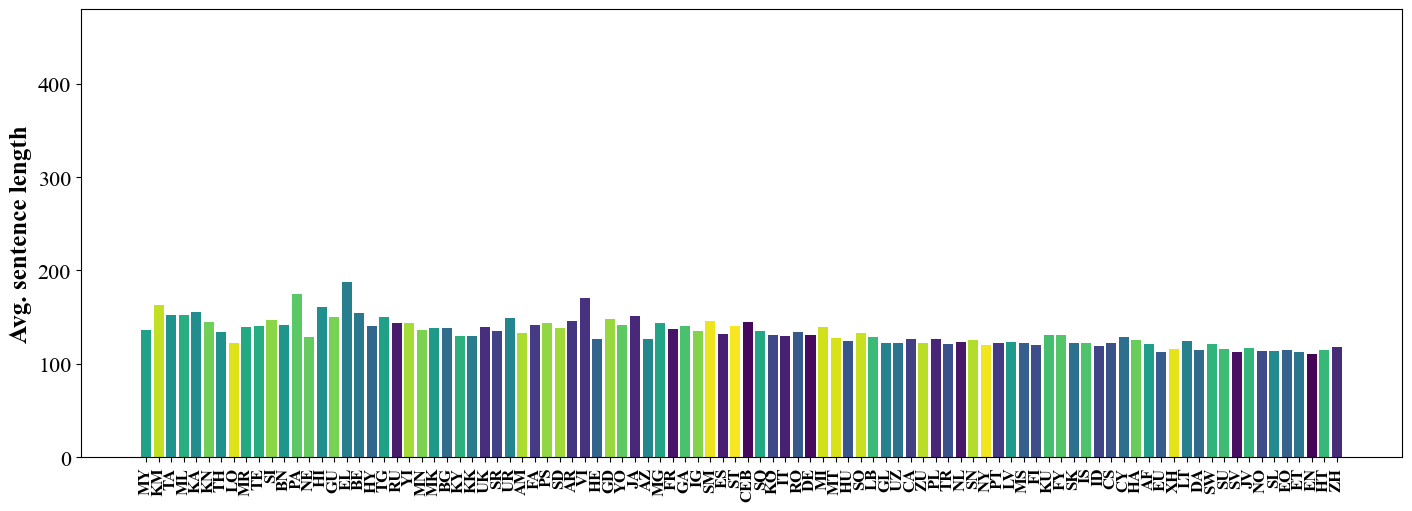

Log min diff: 17.365984740212696
Log mean diff: 0.5388799066873275


In [28]:
title = f"Unigram Subwords rewritten in UTF-8"
plot_token_numbers(flores_unigram_rw, "unigram_bytes", 480.,language_ordering=language_ordering)
compute_log_diff(flores_unigram_rw)

## Compare Parity

         Myte      Byte  Characters  mT5 Subwords
en   1.000000  1.000000    1.000000      1.000000
ceb  1.317909  1.201694    1.200928      1.409275
de   1.216487  1.183669    1.164260      1.180186
sv   1.052377  1.040077    1.001557      1.105623
fr   1.269860  1.241718    1.193430      1.389938
..        ...       ...         ...           ...
lo   1.154015  2.730878    0.985885      1.253369
xh   1.054006  1.054127    1.053836      1.327041
sm   1.340471  1.211649    1.156251      1.884148
ny   1.113726  1.117013    1.114583      1.334454
st   1.309117  1.204049    1.201454      1.559262

[96 rows x 4 columns]
Means: Myte            1.234336
Byte            1.557836
Characters      1.033403
mT5 Subwords    1.381516
dtype: float64
Std: Myte            0.133608
Byte            0.657365
Characters      0.143633
mT5 Subwords    0.228914
dtype: float64


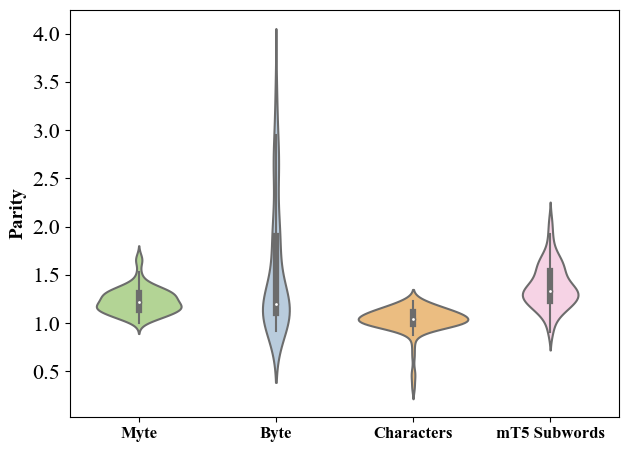

In [29]:

plot_compare_token_numbers([ flores_morfs_all_rw,flores_bytes, flores_utf32, flores_mt5],
                           ['Myte','Byte','Characters','mT5 Subwords'], 
                           "parity_violin",
                           parity="en", violin=True)

           Myte        Byte  Characters  mT5 Subwords
en   109.140316  130.529644  525.604743     34.390316
ceb  143.836957  156.856719  631.213439     48.465415
de   132.767787  154.503953  611.940711     40.586957
sv   114.856719  135.760870  526.422925     38.022727
fr   138.592885  162.081028  627.272727     47.800395
..          ...         ...         ...           ...
lo   125.949605  356.460474  518.185771     43.103755
xh   115.034585  137.594862  553.901186     45.637352
sm   146.299407  158.156126  607.731225     64.796443
ny   121.552372  145.803360  585.830040     45.892292
st   142.877470  157.164032  631.490119     53.623518

[96 rows x 4 columns]
Means: Myte            134.715806
Byte            203.343781
Characters      543.161602
mT5 Subwords     47.510767
dtype: float64
Std: Myte            14.582030
Byte            85.805561
Characters      75.494407
mT5 Subwords     7.872417
dtype: float64


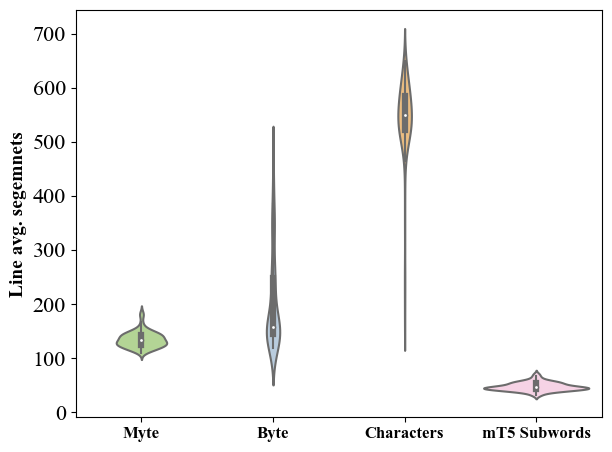

In [30]:
plot_compare_token_numbers([ flores_morfs_all_rw,flores_bytes, flores_utf32, flores_mt5],
                           ['Myte','Byte','Characters','mT5 Subwords'], 
                           "lengths_violin",
                           violin=True)

         Myte      Byte  Characters  mT5 Subwords
en   1.000000  1.000000    1.000000      1.000000
ceb  1.317909  1.201694    1.200928      1.409275
de   1.216487  1.183669    1.164260      1.180186
sv   1.052377  1.040077    1.001557      1.105623
fr   1.269860  1.241718    1.193430      1.389938
..        ...       ...         ...           ...
lo   1.154015  2.730878    0.985885      1.253369
xh   1.054006  1.054127    1.053836      1.327041
sm   1.340471  1.211649    1.156251      1.884148
ny   1.113726  1.117013    1.114583      1.334454
st   1.309117  1.204049    1.201454      1.559262

[96 rows x 4 columns]
Means: Myte            1.234336
Byte            1.557836
Characters      1.033403
mT5 Subwords    1.381516
dtype: float64
Std: Myte            0.133608
Byte            0.657365
Characters      0.143633
mT5 Subwords    0.228914
dtype: float64


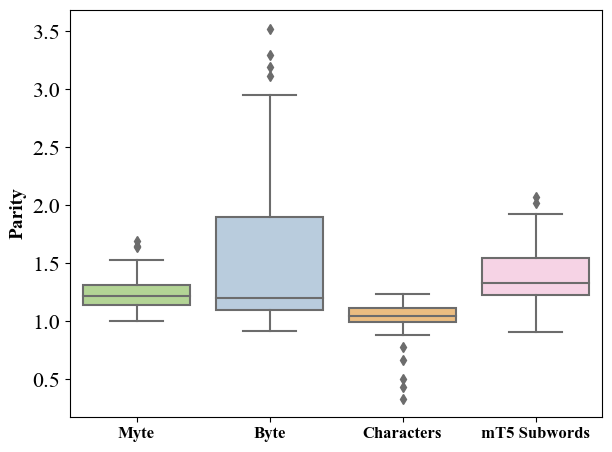

In [31]:
plot_compare_token_numbers([ flores_morfs_all_rw,flores_bytes, flores_utf32, flores_mt5],
                           ['Myte','Byte','Characters','mT5 Subwords'], 
                           "parity_boxplot",
                           parity="en", violin=False)

           Myte        Byte  Characters  mT5 Subwords
en   109.140316  130.529644  525.604743     34.390316
ceb  143.836957  156.856719  631.213439     48.465415
de   132.767787  154.503953  611.940711     40.586957
sv   114.856719  135.760870  526.422925     38.022727
fr   138.592885  162.081028  627.272727     47.800395
..          ...         ...         ...           ...
lo   125.949605  356.460474  518.185771     43.103755
xh   115.034585  137.594862  553.901186     45.637352
sm   146.299407  158.156126  607.731225     64.796443
ny   121.552372  145.803360  585.830040     45.892292
st   142.877470  157.164032  631.490119     53.623518

[96 rows x 4 columns]
Means: Myte            134.715806
Byte            203.343781
Characters      543.161602
mT5 Subwords     47.510767
dtype: float64
Std: Myte            14.582030
Byte            85.805561
Characters      75.494407
mT5 Subwords     7.872417
dtype: float64


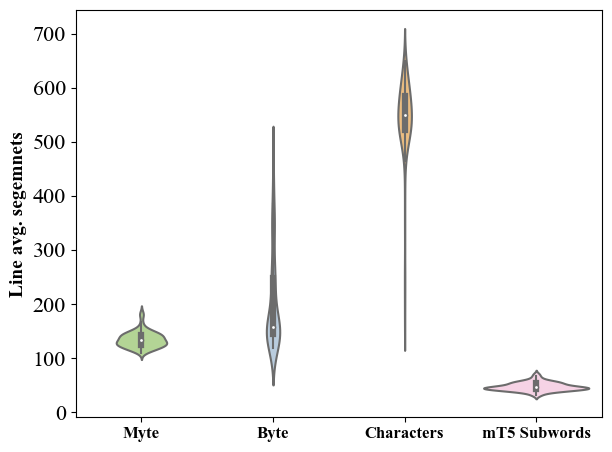

In [32]:
plot_compare_token_numbers([ flores_morfs_all_rw,flores_bytes, flores_utf32, flores_mt5],
                           ['Myte','Byte','Characters','mT5 Subwords'], 
                           "lengths_boxplot",
                           violin=True)

## Sequence compression

In [33]:
def plot_compression_factors(flores_compressed, flores_bytes, save_file=None, language_ordering=None, languages=languages):
    languages = list(flores_compressed.keys()) 
    compression_factors = []
    for lang in languages:
        byte_base = sum([len(sen) for sen in flores_bytes[lang]])
        morph_base = sum([len(sen) for sen in flores_compressed[lang]])
        compression_factors.append(1- (morph_base/byte_base))

    if language_ordering is None:
        language_ordering, compression_factors = zip(*sorted(zip(languages, compression_factors), key=lambda x: x[1], reverse=True))
    else:
        compression_factors = [compression_factors[languages.index(lang)] for lang in language_ordering]

    # plot bar plot going down from 0 to 100 %

    # barplot with pall

    def percent_minus_formatter(x, pos):
        return f"-{x:.0f}%"

    cmap = plt.cm.get_cmap('YlGn')
    norm = BoundaryNorm([-0.1, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], cmap.N)

    plt.figure(figsize=(9, 5.25))
    if len(language_ordering) < 20:
        plt.figure(figsize=(6.75, 5.25))
    else:
        plt.figure(figsize=(19.2 *0.75, 7.2*0.75))

    l_upper = [l.upper() for l in language_ordering]
    plt.bar(l_upper, np.array(compression_factors) * 100, color=cmap(norm(compression_factors)))

    if len(language_ordering) < 20:
        plt.xticks([])
        plt.ylabel("Compression")
    else:
        plt.ylabel("Compression", size=18)

        
    # else:
    #     plt.xticks([l.upper() for l in language_ordering])
    ax = plt.gca()
    formatter = FuncFormatter(percent_minus_formatter)
    ax.yaxis.set_major_formatter(formatter)
    ax.tick_params('x', top=True, bottom=False, labeltop=True, labelbottom=False, rotation=45)
    if len(language_ordering) < 20:
        plt.xticks(rotation=45, weight='bold')
    else:
        plt.xticks(rotation=90, weight='bold')
    ax.set_ylim([min(0., (np.array(compression_factors) * 100).min()),70.])
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    # add percent to y ticks


    ax.invert_yaxis()
    if save_file:
        plt.tight_layout()
        plt.savefig(f"{save_file}.png", dpi=300)

    print(compression_factors)
    plt.show()

    

[0.6323626023085991, 0.5986864982994591, 0.34860834263887874, 0.47025643878288925, 0.44622842261333173, 0.4652099482428984, 0.3821601241960524, 0.010124941450715075, 0.08183281570711332, 0.1449160498945289, 0.07496844814874981, 0.0909022320025149, 0.14726329064189259, 0.1406835595236573, 0.1632736659362667, 0.11934328479018974, 0.1490893574365192, 0.16386567344961245]


<Figure size 900x525 with 0 Axes>

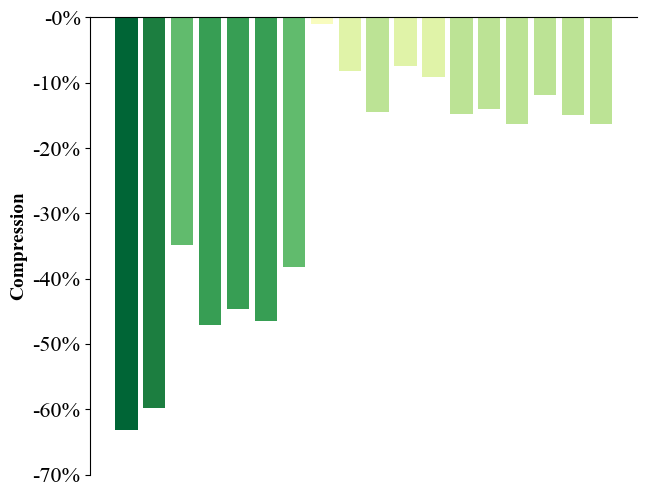

In [34]:
plot_compression_factors(flores_morfs_all_rw, flores_bytes,"compression_sample", language_ordering=language_ordering_sample)

[0.704138096956574, 0.6109724654266686, 0.6323626023085991, 0.6353809201147289, 0.5987966620720103, 0.6235858101629914, 0.6274930842759716, 0.6466660013638708, 0.6011070753868297, 0.5986864982994591, 0.5636284300806806, 0.574378702688275, 0.47283916181444163, 0.6115703209690342, 0.514719929752532, 0.5414597605325795, 0.34860834263887874, 0.4190366862420133, 0.47025643878288925, 0.42660600559658635, 0.44622842261333173, 0.426112181920838, 0.43923516738153145, 0.44526363980174766, 0.4464761752733658, 0.47623272506374437, 0.4652099482428984, 0.42011531174016636, 0.4218283879967395, 0.34118109114764283, 0.3821601241960524, 0.3506380199012098, 0.3151366496630301, 0.3066768610682411, 0.30915958272591304, 0.010124941450715075, 0.29634970313686293, 0.10986445026394664, 0.13207625387161914, 0.08183281570711332, 0.2159767575873992, 0.13032353065424285, 0.1449160498945289, 0.11118575954438437, 0.13665383182213386, 0.07496844814874981, 0.1554803898888979, 0.0909022320025149, 0.0830041766673596, 0.

<Figure size 900x525 with 0 Axes>

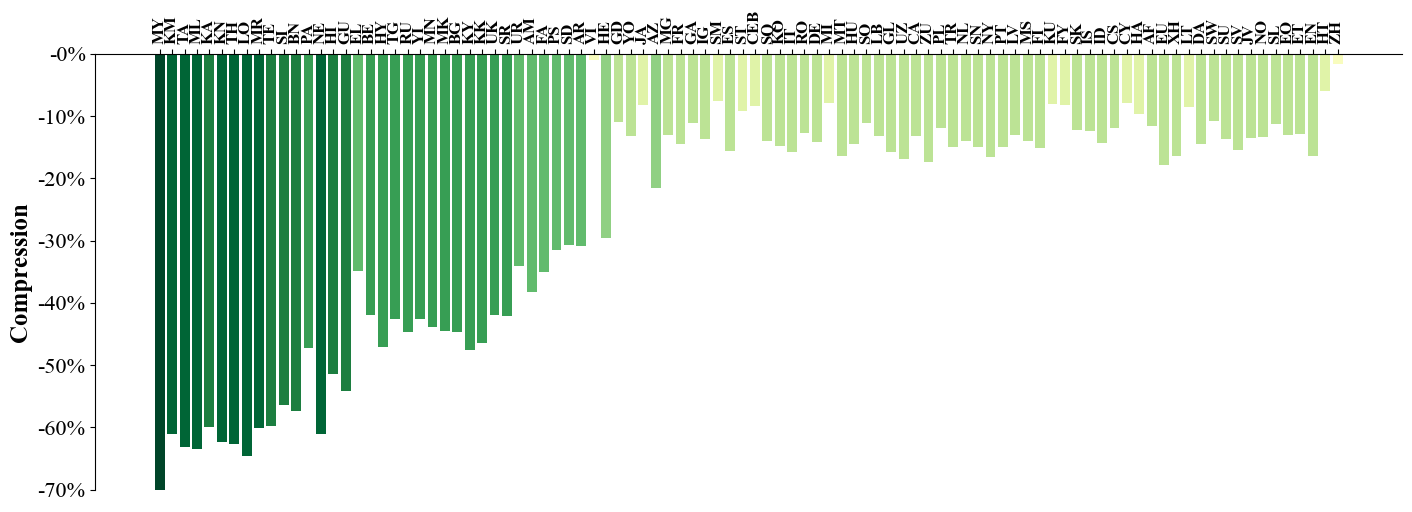

In [35]:
plot_compression_factors(flores_morfs_all_rw, flores_bytes,"compression", language_ordering=language_ordering)

In [36]:
# Set of five languages: Asturian , Sanscrit, Tunisian Arabic, Esperanto, Waray, Santali (Ol Chiki Script)
languages_unseen = ['ast',  'eo', 'war','aeb', 'sa', 'sal']

palette_unseen = sns.color_palette("inferno", len(languages_unseen))
languages_colors_unseen = {lang: col for lang, col in zip(languages_unseen, palette_unseen)}

languages_flores_unseen = {'ast': 'ast_Latn', 'eo': 'epo_Latn', 'war': 'war_Latn', 'aeb': 'aeb_Arab', 'sa': 'san_Deva', 'sal': 'sat_Olck'}

flores_unseen = {}
for lang in languages_unseen:
    with open(f'flores200_dataset/devtest/{languages_flores_unseen[lang]}.devtest', 'r') as f:
        flores_unseen[lang] = f.read().splitlines()


In [ ]:
# Decomposing flores unseen

In [37]:
flores_unseen_utf32 = {lang: [bytes(line, 'utf-32') for line in flores_unseen[lang]] for lang in flores_unseen.keys()}
flores_unseen_bytes = {lang: [bytes(line, 'utf-8') for line in flores_unseen[lang]] for lang in flores_unseen.keys()}
flores_unseen_mt5 = {lang: [tokenizer.encode(line) for line in flores_unseen[lang]] for lang in flores_unseen.keys()}

flores_unseen_decomposed_rw = {lang: [decompose_rewriter.rewrite_bytes(str_to_hex(line).split(' ')) for line in flores_unseen[lang]] for lang in flores_unseen.keys()}
flores_unseen_morfs_all_rw = {lang: [morf_all_rewriter.rewrite_bytes(decompose_rewriter.rewrite_bytes(str_to_hex(line).split(' '))) for line in flores_unseen[lang]] for lang in flores_unseen.keys()}  

In [38]:
languages_unseen_ordering = get_language_ordering(flores_unseen_bytes)

<Figure size 900x525 with 0 Axes>

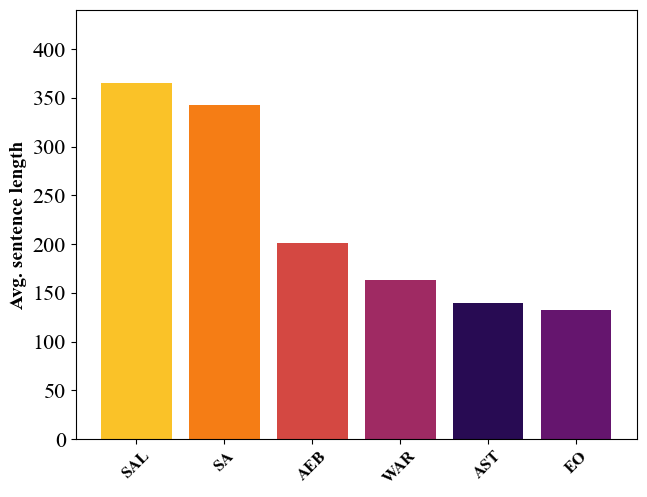

Log min diff: 2.653419952321528
Log mean diff: 0.5105625100264035


In [39]:
plot_token_numbers(flores_unseen_bytes, "bytes_utf8_unseen", 440., language_ordering=languages_unseen_ordering, languages_colors=languages_colors_unseen)
compute_log_diff(flores_unseen_bytes)

<Figure size 900x525 with 0 Axes>

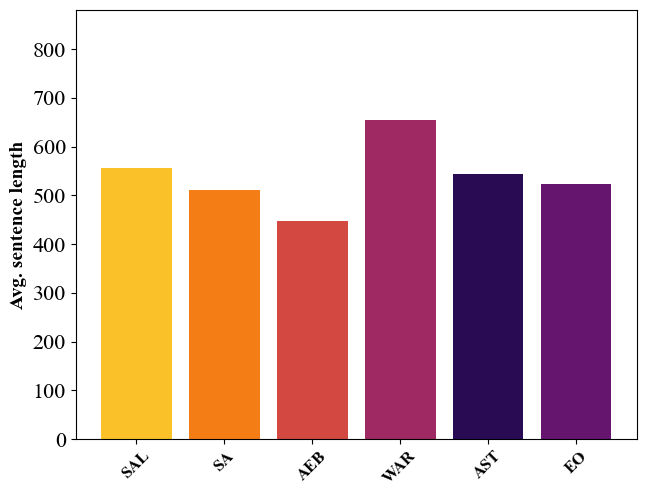

Log min diff: 1.088792502223086
Log mean diff: 0.039181144062219175


In [40]:
plot_token_numbers(flores_unseen_utf32, "bytes_utf32_unseen", 880., language_ordering=languages_unseen_ordering, languages_colors=languages_colors_unseen)
compute_log_diff(flores_unseen_utf32)

<Figure size 900x525 with 0 Axes>

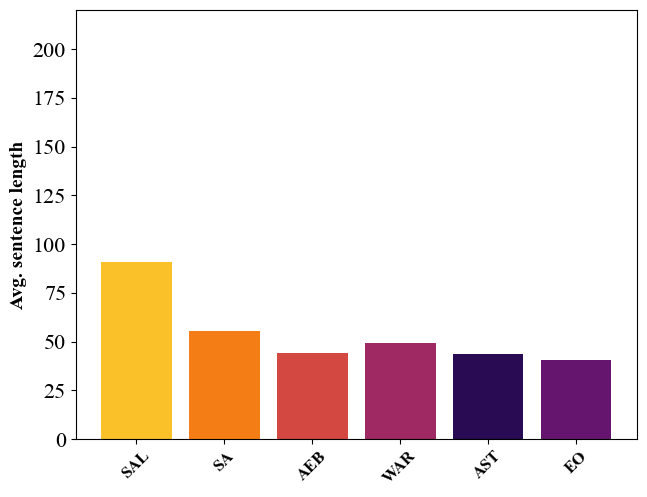

Log min diff: 1.4669161861193132
Log mean diff: 0.2450690002531246


In [41]:
plot_token_numbers(flores_unseen_mt5, "subword_tokens_unseen", 220., language_ordering=languages_unseen_ordering, languages_colors=languages_colors_unseen)
compute_log_diff(flores_unseen_mt5)

<Figure size 900x525 with 0 Axes>

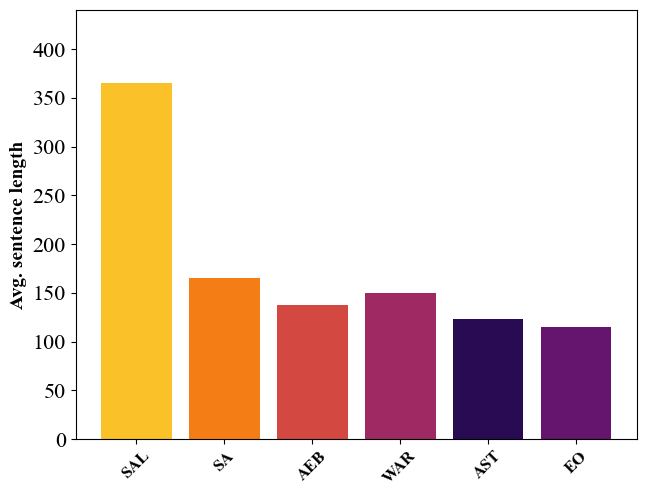

Log min diff: 2.0309166479751504
Log mean diff: 0.5221009648469099


In [42]:
plot_token_numbers(flores_unseen_morfs_all_rw, "mbytes_unseen", 440., language_ordering=languages_unseen_ordering, languages_colors=languages_colors_unseen)
compute_log_diff(flores_unseen_morfs_all_rw)


[-0.00042511135480549633, 0.5167116462528545, 0.31481026588323147, 0.08151603569283783, 0.11817789627785602, 0.1294357793363341]


<Figure size 900x525 with 0 Axes>

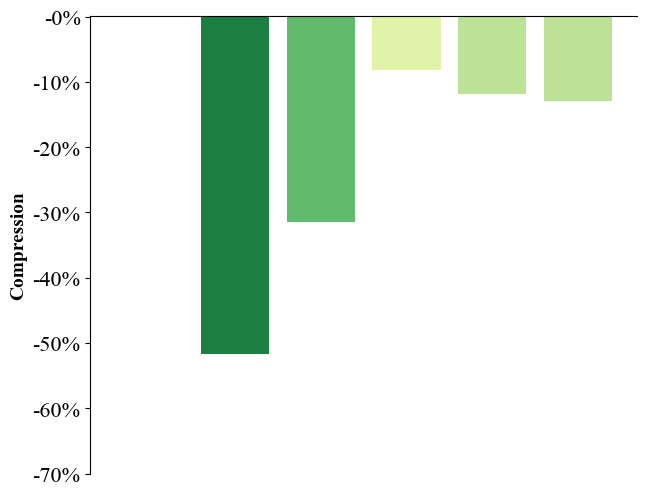

In [43]:
plot_compression_factors(flores_unseen_morfs_all_rw, flores_unseen_bytes, "compression_unseen", language_ordering=languages_unseen_ordering, languages=languages_unseen)

In [ ]:
## Table with parity length results

In [44]:
def aggregate_results(lang_tokenized_methods, method_names, save_file=None):
    token_number_methods = {}
    for lang_tokenized, method in zip(lang_tokenized_methods, method_names):
        token_numbers = {}
        for lang in lang_tokenized.keys():
            token_numbers[lang] = sum(len(tokenized_line) for tokenized_line in lang_tokenized[lang]) / len(lang_tokenized[lang])
        token_number_methods[method] = token_numbers
    
    parity_df = pd.DataFrame(token_number_methods)
    en_values = parity_df.loc['en']
    for method in method_names:
        parity_df[(method, 'Parity')] = parity_df[method].div(en_values[method])
        parity_df[(method, 'Length')] = parity_df[method]
        
    parity_df.drop(method_names, axis=1, inplace=True)
    parity_df.columns = pd.MultiIndex.from_tuples(parity_df.columns)
    parity_df["Compression"] = 1. - (parity_df[(method_names[1], "Length")] / parity_df[(method_names[0], "Length")])
    
    parity_df['group'] = parity_df.index.map(lambda l: language_groups[l])
    parity_df['coarse group'] = parity_df.index.map(lambda l: language_groups_coarse[l])
    
    en_avg = parity_df.drop(["group", "coarse group"], axis=1).loc[["en"], :]
    granular_avg = parity_df.drop("coarse group", axis=1).groupby('group').mean()
    coarse_avg = parity_df.drop("group", axis=1).groupby("coarse group").mean()
    
    df_avg = pd.concat([en_avg, granular_avg, coarse_avg])
    if save_file:
        df_avg.to_latex(f"{save_file}.tex", float_format="%.2f", label=save_file)
    print(df_avg)

In [45]:
flores_bytes.update(flores_unseen_bytes)
flores_morfs_all_rw.update(flores_unseen_morfs_all_rw)
lang_tokenized_methods = [flores_bytes, flores_morfs_all_rw]
method_names = ["Byte", "Myte"]

aggregate_results(lang_tokenized_methods, method_names, "aggregated_parities")



                   Byte                  Myte             Compression
                 Parity      Length    Parity      Length            
en             1.000000  130.529644  1.000000  109.140316    0.163866
Latin HR       1.141255  148.967577  1.179147  128.692502    0.138103
Latin LR       1.123484  146.648024  1.176040  128.353384    0.124347
Non-Latin HR   1.623755  211.948123  1.293937  141.220726    0.285958
Non-Latin LR   2.333881  304.640635  1.328472  144.989864    0.498959
Unseen Lang    1.499458  195.723715  1.266847  138.264032    0.232130
Unseen Script  2.795808  364.935771  3.345152  365.090909   -0.000425
Seen           1.563577  204.093125  1.236233  134.922810    0.262515
Unseen         1.715516  223.925725  1.613231  176.068511    0.193371


/var/folders/9n/nnn8h5vs5sg4nqlp3t2w_q480000gn/T/ipykernel_45829/1177173311.py:28: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_avg.to_latex(f"{save_file}.tex", float_format="%.2f", label=save_file)
